In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [1]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
def plot_confusion_matrix(y_true, y_pred, title):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap="Blues")
    plt.title(title)
    plt.show()

In [3]:
iris = load_iris()
X, y = iris.data, iris.target
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
X_extended = np.hstack((X, kmeans.transform(X))) 

X_train, X_test, y_train, y_test = train_test_split(X_extended, y, test_size=0.2, random_state=0)

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



===== Raport dla Random Forest =====

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



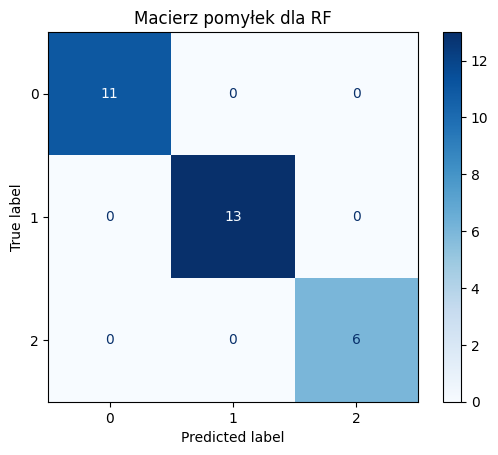

In [5]:
print("\n===== Raport dla Random Forest =====\n")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Macierz pomyłek dla RF")

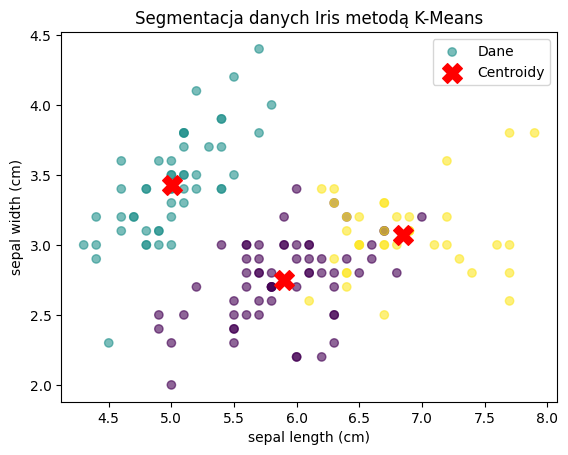

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.6, label="Dane")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroidy")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Segmentacja danych Iris metodą K-Means")
plt.legend()
plt.show()
